In [2]:
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

--2020-10-30 15:37:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.77MB/s    in 0.4s    

2020-10-30 15:37:26 (3.77 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [3]:
!unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_excel("AirQualityUCI.xlsx")
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [11]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [12]:
df.skew()

CO(GT)          -1.666180
PT08.S1(CO)     -1.721126
NMHC(GT)         4.075784
C6H6(GT)        -4.508775
PT08.S2(NMHC)   -0.793153
NOx(GT)          0.825255
PT08.S3(NOx)    -0.384464
NO2(GT)         -1.225789
PT08.S4(NO2)    -1.243944
PT08.S5(O3)     -0.034500
T               -4.445411
RH              -3.932440
AH              -4.754570
dtype: float64

In [13]:
# percent of missing values
df.isna().sum()/len(df)

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f659d94f358>,
      dtype=object)

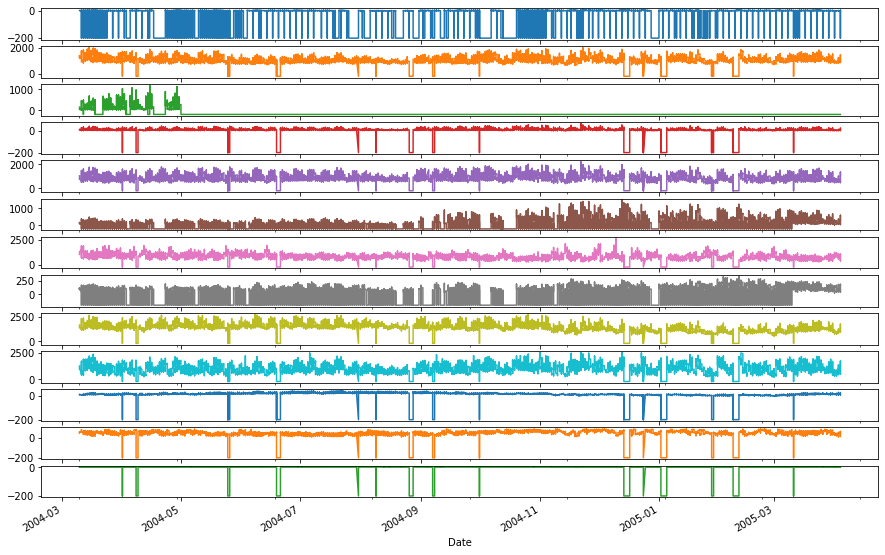

In [15]:
df.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

<Figure size 432x288 with 0 Axes>

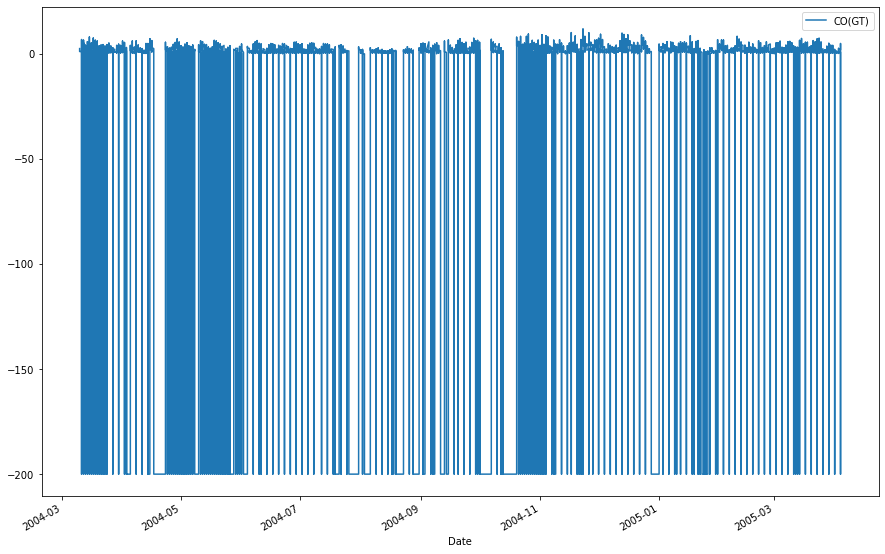

In [17]:
plt.figure(); df.plot(x='Date',y='CO(GT)',figsize=(15, 10)); plt.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


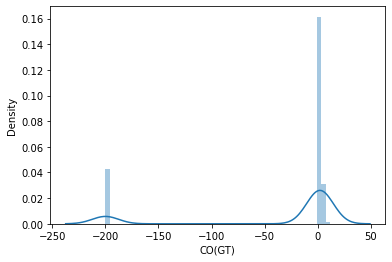

In [18]:
sns.distplot(df["CO(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


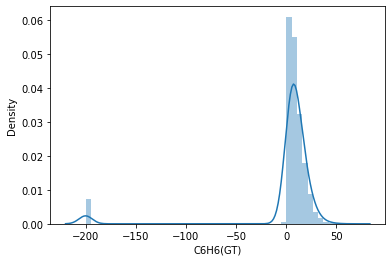

In [19]:
sns.distplot(df["C6H6(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


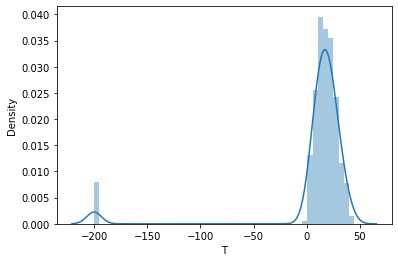

In [20]:
sns.distplot(df["T"])

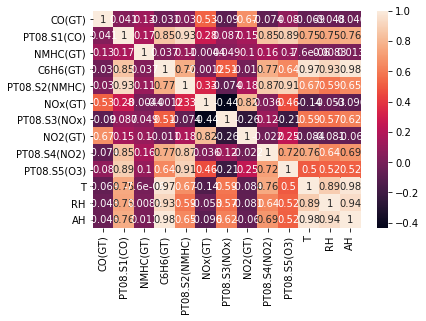

In [21]:
sns.heatmap(df.corr(), annot=True)

In [23]:
X = df[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)'	,'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]

In [24]:
Y = df[['AH']]

In [25]:
n = len(df)
x_train_df = X[0:int(n*0.8)]
x_test_df = X[int(n*0.8):]
y_train_df = Y[0:int(n*0.8)]
y_test_df = Y[int(n*0.8):]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_df)
x_train = scaler.fit_transform(x_train_df)
scaler.fit(x_test_df)
x_test = scaler.fit_transform(x_test_df)
scaler.fit(y_train_df)
y_train = scaler.fit_transform(y_train_df)
scaler.fit(y_test_df)
y_test = scaler.fit_transform(y_test_df)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7485, 11, 1)
(1872, 11, 1)
(7485, 1)
(1872, 1)


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    # have to convert to 3D for feeding the data
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor
regressor = RNN_MODEL()
regressor.fit(x_train,y_train,epochs = 50)

Epoch 1/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0521 - accuracy: 0.0076
Epoch 2/50
234/234 [==============================] - 4s 19ms/step - loss: 0.0254 - accuracy: 0.0098
Epoch 3/50
234/234 [==============================] - 5s 19ms/step - loss: 0.0129 - accuracy: 0.0342
Epoch 4/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0072 - accuracy: 0.0369
Epoch 5/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0059 - accuracy: 0.0371
Epoch 6/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0050 - accuracy: 0.0374
Epoch 7/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0047 - accuracy: 0.0374
Epoch 8/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0040 - accuracy: 0.0375
Epoch 9/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0038 - accuracy: 0.0375
Epoch 10/50
234/234 [==============================] - 4s 18ms/step - loss: 0.0034 - accura

In [29]:
regressor.evaluate(x_test,y_test)
y_pred = regressor.predict(x_test)
output = scaler.inverse_transform(y_pred)
real_output = []
for item in output:
    real_output.append((item[0]))

59/59 [==============================] - 0s 4ms/step - loss: 2.9910e-04 - accuracy: 0.0465
